# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data=pd.read_csv('data/kc_house_data.csv')

In [3]:
y = data['price']
X = pd.get_dummies(data[['sewer_system','heat_source','grade','condition']])
model = sm.OLS(y, sm.add_constant(X)).fit()


In [4]:
dp = pd.concat([X,y],axis=1)
dp.corr().price.sort_values(ascending=False)

price                              1.000000
grade_11 Excellent                 0.317190
grade_10 Very Good                 0.300315
grade_12 Luxury                    0.282957
grade_9 Better                     0.202575
grade_13 Mansion                   0.198060
heat_source_Gas                    0.143009
heat_source_Gas/Solar              0.036684
condition_Average                  0.036382
sewer_system_PUBLIC                0.021788
condition_Very Good                0.008617
grade_1 Cabin                      0.002217
heat_source_Other                  0.001132
sewer_system_PUBLIC RESTRICTED    -0.001262
heat_source_Oil/Solar             -0.002266
sewer_system_PRIVATE RESTRICTED   -0.005218
grade_2 Substandard               -0.007323
heat_source_Electricity/Solar     -0.008419
grade_3 Poor                      -0.014922
grade_8 Good                      -0.018796
grade_4 Low                       -0.021569
sewer_system_PRIVATE              -0.021625
condition_Poor                  

In [5]:
# Dropping houses with grade "5 Fair" and below 

nice_houses = data.drop(data[data.grade.isin(["5 Fair", "4 Low", "3 Poor", "2 Substandard", "1 Cabin"])].index)

In [6]:
# Dropping houses with no bedrooms

nice_houses = nice_houses.loc[(nice_houses['bedrooms']!=0)]

In [7]:
# Dropping houses with no bathrooms

nice_houses = nice_houses.loc[(nice_houses['bathrooms']!=0)]

In [8]:
# Dropping lat, long, and id columns.

nice_houses.drop(columns= ['lat', 'long', 'id'], inplace=True)

In [9]:
# Adding zip code column

nice_houses['zip'] = nice_houses['address'].str.extract(r'(\d{5}-?\d{0,4})')
#nice_houses['zip'] = pd.to_numeric(nice_houses['zip'])

In [10]:
# Filtering by zip codes with strong school districts

top_school_districts = ['98004', '98005', '98007', '98008', '98039', '98052', '98074', '98033', '98006', '98053', '98034', '98075', '98029', '98027', '98011', '98040', '98028', '98072', '98077', '98059', 
                        '98155', '98038', '98024', '98065', '98177']
#top_school_districts.t

nice_houses = nice_houses.loc[nice_houses['zip'].isin(top_school_districts)]


In [12]:
# Filtering by zip codes based on cost of living
#livingcost_zip_code = ['98074', '98065', '98019', '98052', '98077', '98029', '98075', '98010', '98038', '98053', '98028', 
#                       '98005', '98033', '98034', '98004', '98042', '98006', '98007', '98011', '98045', '98121', '98092', '98039', '98008', '98059']

#nice_houses = nice_houses.loc[nice_houses['zip'].isin(livingcost_zip_code)]

In [13]:
#Dropping sewer system and heat source
nice_houses=nice_houses.drop(columns=['sewer_system','heat_source'])
nice_houses.info()#Sanity Check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4236 entries, 4 to 30131
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4236 non-null   object 
 1   price          4236 non-null   float64
 2   bedrooms       4236 non-null   int64  
 3   bathrooms      4236 non-null   float64
 4   sqft_living    4236 non-null   int64  
 5   sqft_lot       4236 non-null   int64  
 6   floors         4236 non-null   float64
 7   waterfront     4236 non-null   object 
 8   greenbelt      4236 non-null   object 
 9   nuisance       4236 non-null   object 
 10  view           4236 non-null   object 
 11  condition      4236 non-null   object 
 12  grade          4236 non-null   object 
 13  sqft_above     4236 non-null   int64  
 14  sqft_basement  4236 non-null   int64  
 15  sqft_garage    4236 non-null   int64  
 16  sqft_patio     4236 non-null   int64  
 17  yr_built       4236 non-null   int64  
 18  yr_reno

In [18]:
nice_houses['price'] = nice_houses['price'].astype(int)
#nice_houses = nice_houses[nice_houses['price'] > 100000] 
#nice_houses = nice_houses[nice_houses['price'] < 2000000] 
nice_houses.loc[(nice_houses['price'] >= 100000) & (nice_houses['price'] < 2000000)]
nice_houses.loc[(nice_houses['bathrooms'] > 1) & (nice_houses['bathrooms'] <= 3)]
nice_houses.loc[(nice_houses['bedrooms'] >= 2) & (nice_houses['bedrooms'] <= 5)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,zip
4,8/24/2021,592500,2,2.0,1120,758,2.0,NO,NO,YES,...,Average,7 Average,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",98027
20,10/19/2021,1320000,3,2.0,1640,7875,1.0,NO,NO,YES,...,Very Good,7 Average,1640,0,290,370,1956,0,"1249 149th Place Southeast, Bellevue, Washingt...",98007
27,2/26/2022,4500000,4,3.0,2760,13150,1.5,NO,NO,NO,...,Good,9 Better,2760,0,0,160,1954,0,"8637 Northeast 6th Street, Medina, Washington ...",98039
29,9/13/2021,880000,3,2.5,2390,3600,2.0,NO,NO,NO,...,Average,9 Better,2390,0,550,0,1975,0,"1428 170th Place Northeast, Bellevue, Washingt...",98008
36,6/29/2021,2450000,4,3.5,2300,8370,2.0,NO,NO,NO,...,Average,9 Better,2300,0,560,110,1950,1995,"9411 Northeast 32nd Street, Clyde Hill, Washin...",98004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,5/15/2022,995000,3,2.0,1750,10335,1.0,NO,NO,NO,...,Very Good,7 Average,1750,0,0,0,1965,0,"9304 Northeast 184th Place, Bothell, Washingto...",98011
30113,5/2/2022,1100000,4,2.5,2070,8336,2.0,NO,NO,NO,...,Good,8 Good,2070,0,700,690,1988,0,"5106 Northeast 23rd Street, Renton, Washington...",98059
30127,5/10/2022,1850000,4,2.5,2100,8560,2.0,NO,NO,NO,...,Average,8 Good,2100,0,820,70,1976,2021,"1924 177th Avenue Northeast, Bellevue, Washing...",98008
30130,3/9/2022,2435000,5,3.0,3920,8414,1.0,NO,NO,YES,...,Good,9 Better,2210,2210,500,350,1954,0,"9823 Mercerwood Drive, Mercer Island, Washingt...",98040


In [19]:
nice_houses.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,zip
4,8/24/2021,592500,2,2.0,1120,758,2.0,NO,NO,YES,...,Average,7 Average,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",98027
20,10/19/2021,1320000,3,2.0,1640,7875,1.0,NO,NO,YES,...,Very Good,7 Average,1640,0,290,370,1956,0,"1249 149th Place Southeast, Bellevue, Washingt...",98007
27,2/26/2022,4500000,4,3.0,2760,13150,1.5,NO,NO,NO,...,Good,9 Better,2760,0,0,160,1954,0,"8637 Northeast 6th Street, Medina, Washington ...",98039


In [20]:
nice_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4236 entries, 4 to 30131
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4236 non-null   object 
 1   price          4236 non-null   int64  
 2   bedrooms       4236 non-null   int64  
 3   bathrooms      4236 non-null   float64
 4   sqft_living    4236 non-null   int64  
 5   sqft_lot       4236 non-null   int64  
 6   floors         4236 non-null   float64
 7   waterfront     4236 non-null   object 
 8   greenbelt      4236 non-null   object 
 9   nuisance       4236 non-null   object 
 10  view           4236 non-null   object 
 11  condition      4236 non-null   object 
 12  grade          4236 non-null   object 
 13  sqft_above     4236 non-null   int64  
 14  sqft_basement  4236 non-null   int64  
 15  sqft_garage    4236 non-null   int64  
 16  sqft_patio     4236 non-null   int64  
 17  yr_built       4236 non-null   int64  
 18  yr_reno

In [21]:
y1 = nice_houses['price']
x1 = pd.get_dummies(nice_houses[['sqft_living', 'condition', 'yr_built', 'grade', 'bedrooms', 'bathrooms', 'sqft_lot']])
model = sm.OLS(y1,sm.add_constant(x1)).fit()

dp2 = pd.concat([x1,y1],axis=1)
dp2.corr().price.sort_values(ascending=False)

price                  1.000000
sqft_living            0.649268
bathrooms              0.534064
grade_12 Luxury        0.375263
grade_11 Excellent     0.349191
bedrooms               0.315784
grade_10 Very Good     0.206974
grade_13 Mansion       0.179761
yr_built               0.170179
sqft_lot               0.111203
condition_Average      0.087192
grade_9 Better         0.073633
condition_Very Good   -0.008268
condition_Poor        -0.016459
condition_Fair        -0.040851
condition_Good        -0.081966
grade_6 Low Average   -0.091571
grade_8 Good          -0.164338
grade_7 Average       -0.295102
Name: price, dtype: float64

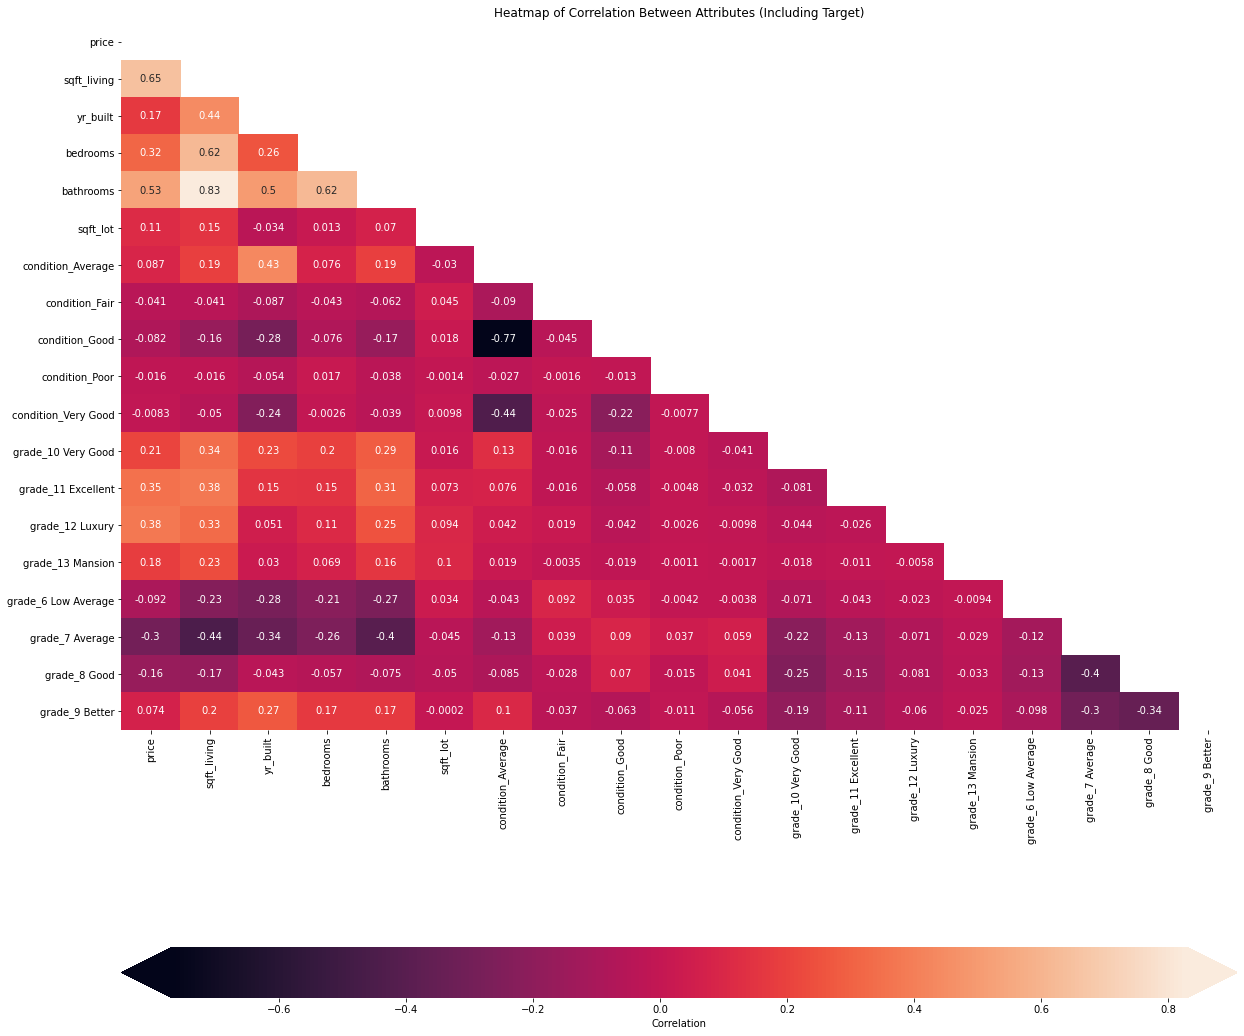

In [22]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y1, x1], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

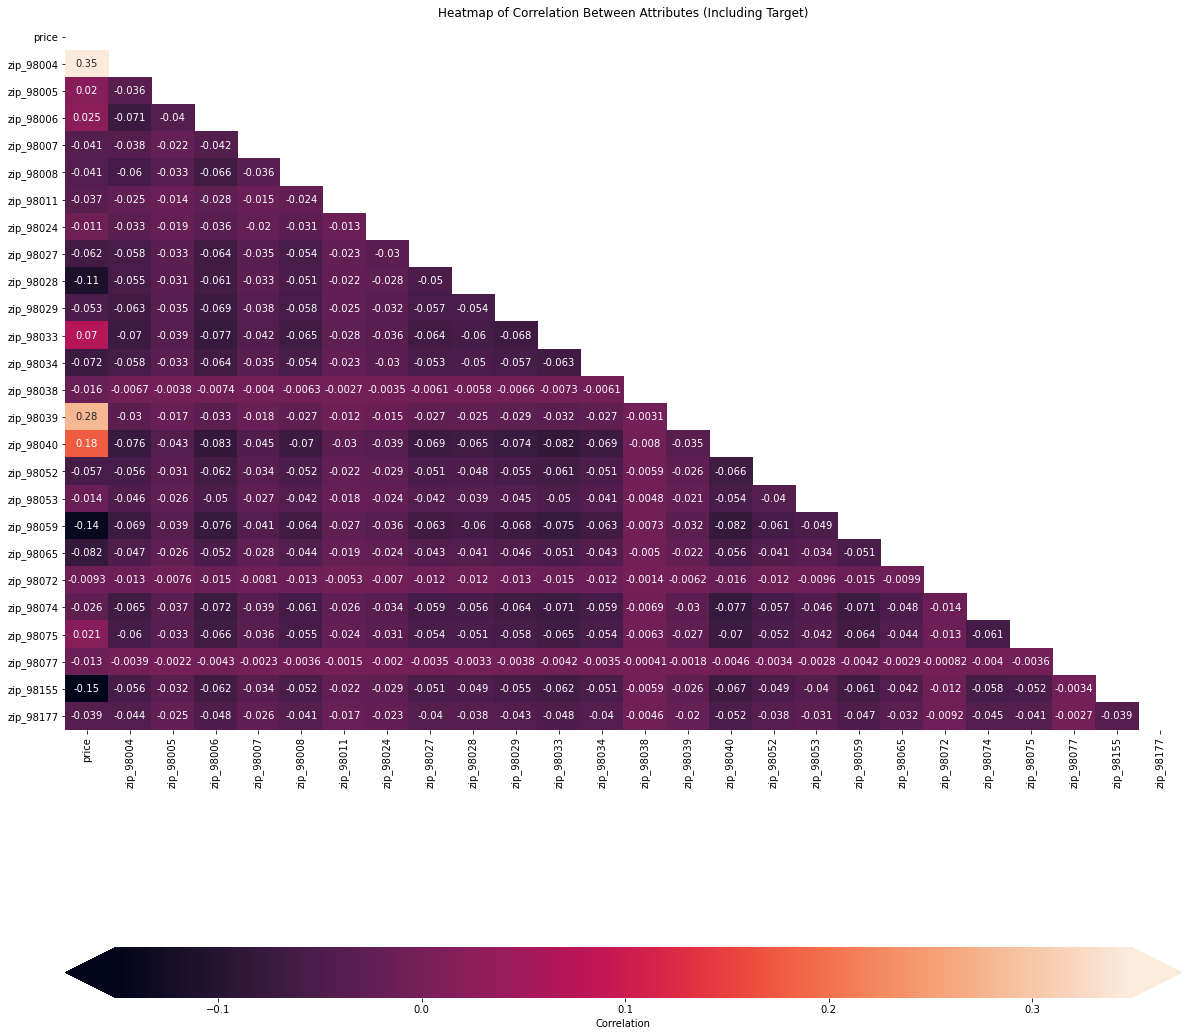

In [23]:
y2 = nice_houses['price']
x2 = pd.get_dummies(nice_houses[['zip']])
model = sm.OLS(y1,sm.add_constant(x1)).fit()

dp2 = pd.concat([x2,y2],axis=1)
dp2.corr().price.sort_values(ascending=False)

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y2, x2], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");